In [1]:
# Dunn Index is used to measure the efficiency of Clustering algorithm.
# High dunn index is considered good.

# Dunn index= max(d(i,j))/max(d'(i,j))
#             where d(i,j) is the intercluster distance between cluster i and j
#                   max(d'(i,j)) is the maximum intracluster distance for cluster i and j

In [2]:
#Here we are considering a dataset which is already clustered.
#We will be calculating Dunn index for the same.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def dunn_index(df):
    #count no. of clusters
    n_clusters= len(df['Cluster'].unique())

    sns.scatterplot(data= df, x='x',y='y',hue= 'Cluster',palette= sns.color_palette('bright',n_colors= n_clusters))
    
    #finding the maximum intracluster distance(distance between farthest points in a cluster)
    #We will be using manhatten distance to make our calculations fast.
    max_intra= 0

    #traversing all the clusters
    for i in range(n_clusters):
        #creating a sub dataframe
        #finding the ith cluster
        sub_df= df[df['Cluster']==i][['x','y']]
        #print(sub_df)

        #traversing all the points in cluster
        for point in sub_df.itertuples():
            for point_ in sub_df.itertuples():
                #print(point_)
                distance= abs(point.x-point_.x)+abs(point.y-point_.y)

                #update value of intracluster distance
                max_intra= max(max_intra,distance)

                #print(distance)  
    print(f'Intra cluster distance is {max_intra}')
    
    
    #finding the maximum intercluster distance(distance between farthest points in two clusters)
    #We will be using manhatten distance to make our calculations fast and easy.
    max_inter= 0

    #traversing all the clusters
    for i in range(n_clusters-1):
        #creating a sub dataframe
        #finding the ith cluster
        sub_df1= df[df['Cluster']==i][['x','y']]
        #print(sub_df1)

        for j in range(i+1,n_clusters):
            sub_df2= df[df['Cluster']==j][['x','y']]

            #traversing all the points in cluster i
            for point in sub_df1.itertuples():
                #traversing all the points in cluster j
                for point_ in sub_df2.itertuples():
                    #print(point_)
                    distance= abs(point.x-point_.x)+abs(point.y-point_.y)

                    #update value of intracluster distance
                    max_inter= max(max_inter,distance)

                    #print(distance)  
    print(f'Inter cluster distance is {max_inter}')
    
    #required dunn index
    Dunn_index= round(max_inter/max_intra,2)
    print(f'Dunn_index for the given clustering is {Dunn_index}.')

            x           y  Cluster
0   79.408289  152.834424        0
1   98.046263  186.910700        0
2  240.578979   48.473684        1
3  109.687183  277.945769        0
4  249.626082  229.753352        1
Intra cluster distance is 280.08764339
Inter cluster distance is 666.6402653700001
Dunn_index for the given clustering is 2.38.


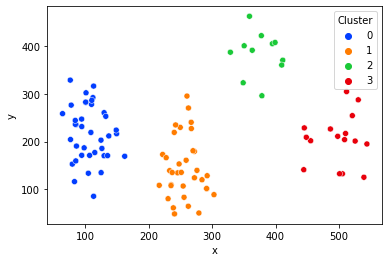

In [5]:
#creating dataframe using basic1.csv file
df= pd.read_csv('basic1.csv')
print(df.head())
dunn_index(df)

               x           y  Cluster
9789  271.341817  152.122986        1
9790  374.928092  424.480855        2
9791  496.467434  317.553201        3
9792  484.710737  251.504081        3
9793  358.131242  445.470938        2
Intra cluster distance is 399.46962890000003
Inter cluster distance is 792.8912217
Dunn_index for the given clustering is 1.98.


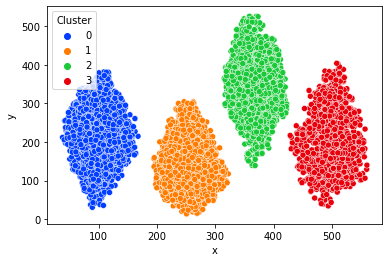

In [6]:
#creating dataframe using basic1.csv file
df= pd.read_csv('basic2.csv')
print(df.tail())
dunn_index(df)